In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold
from create_matrix import *
import os
import sys
from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
from sklearn.model_selection import train_test_split, KFold
from common import compute_rmse_fraction
from common import compute_rmse

appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}
APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
year = 2014
n_splits = 10
case=2
a=2
cost='abs'

In [2]:
def un_normalize(x, maximum, minimum):
    return (maximum - minimum) * x + minimum

def get_tensor(df, dfc):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()

    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[2014][region][start - 1:stop - 1]).reshape(-1, 1)

    dfc = df.copy()

    df = dfc[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 7, stop - start))
    M, N, O = tensor.shape
    return tensor

In [3]:
region = "SanDiego"
sd_df, sd_dfc = create_matrix_single_region("SanDiego", year)
sd_tensor = get_tensor(sd_df, sd_dfc)
region = "Austin"
au_df, au_dfc = create_matrix_single_region("Austin", year)
au_tensor = get_tensor(au_df, au_dfc)

In [56]:
def load_obj(name):
    with open(os.path.expanduser('./results/data/' + name + '.pkl'), 'rb') as f:
        return pickle.load(f)

In [57]:
import pickle
pred = {}
for method in ['normal', 'transfer']:
    pred[method] = {}
    for algo in ['adagrad', 'gd', 'gd_decay']:
        pred[method][algo] = {}
        for cost in['abs', 'rel']:
            pred[method][algo][cost] = {}
            for a in [2, 3]:
                pred[method][algo][cost][a] = {}
                for lr in [0.01, 0.1, 1, 10, 100]:
                    lr = float(lr)
                    pred[method][algo][cost][a][lr] = {}
                    for random_seed in range(10):
                        print method, algo, cost, a, lr, random_seed
                        pred[method][algo][cost][a][lr][random_seed] = load_obj('pred/pred_' + method + '_' + algo + '_'
                                                                               + cost + '_' + str(a) + '_' + str(lr)
                                                                               + '_' + str(random_seed))

normal adagrad abs 2 0.01 0
normal adagrad abs 2 0.01 1
normal adagrad abs 2 0.01 2
normal adagrad abs 2 0.01 3
normal adagrad abs 2 0.01 4
normal adagrad abs 2 0.01 5
normal adagrad abs 2 0.01 6
normal adagrad abs 2 0.01 7
normal adagrad abs 2 0.01 8
normal adagrad abs 2 0.01 9
normal adagrad abs 2 0.1 0
normal adagrad abs 2 0.1 1
normal adagrad abs 2 0.1 2
normal adagrad abs 2 0.1 3
normal adagrad abs 2 0.1 4
normal adagrad abs 2 0.1 5
normal adagrad abs 2 0.1 6
normal adagrad abs 2 0.1 7
normal adagrad abs 2 0.1 8
normal adagrad abs 2 0.1 9
normal adagrad abs 2 1.0 0
normal adagrad abs 2 1.0 1
normal adagrad abs 2 1.0 2
normal adagrad abs 2 1.0 3
normal adagrad abs 2 1.0 4
normal adagrad abs 2 1.0 5
normal adagrad abs 2 1.0 6
normal adagrad abs 2 1.0 7
normal adagrad abs 2 1.0 8
normal adagrad abs 2 1.0 9
normal adagrad abs 2 10.0 0
normal adagrad abs 2 10.0 1
normal adagrad abs 2 10.0 2
normal adagrad abs 2 10.0 3
normal adagrad abs 2 10.0 4
normal adagrad abs 2 10.0 5
normal adagr

In [58]:
import pickle
out = {}
for method in ['normal', 'transfer']:
    out[method] = {}
    for algo in ['adagrad', 'gd', 'gd_decay']:
        out[method][algo] = {}
        for cost in['abs', 'rel']:
            out[method][algo][cost] = {}
            for a in [2, 3]:
                out[method][algo][cost][a] = {}
                for lr in [0.01, 0.1, 1, 10, 100]:
                    lr = float(lr)
                    print method, algo, cost, a, lr
                    out[method][algo][cost][a][lr] = load_obj('out/out_' + method + '_' + algo + '_'
                                                                               + cost + '_' + str(a) + '_' + str(lr))

normal adagrad abs 2 0.01
normal adagrad abs 2 0.1
normal adagrad abs 2 1.0
normal adagrad abs 2 10.0
normal adagrad abs 2 100.0
normal adagrad abs 3 0.01
normal adagrad abs 3 0.1
normal adagrad abs 3 1.0
normal adagrad abs 3 10.0
normal adagrad abs 3 100.0
normal adagrad rel 2 0.01
normal adagrad rel 2 0.1
normal adagrad rel 2 1.0
normal adagrad rel 2 10.0
normal adagrad rel 2 100.0
normal adagrad rel 3 0.01
normal adagrad rel 3 0.1
normal adagrad rel 3 1.0
normal adagrad rel 3 10.0
normal adagrad rel 3 100.0
normal gd abs 2 0.01
normal gd abs 2 0.1
normal gd abs 2 1.0
normal gd abs 2 10.0
normal gd abs 2 100.0
normal gd abs 3 0.01
normal gd abs 3 0.1
normal gd abs 3 1.0
normal gd abs 3 10.0
normal gd abs 3 100.0
normal gd rel 2 0.01
normal gd rel 2 0.1
normal gd rel 2 1.0
normal gd rel 2 10.0
normal gd rel 2 100.0
normal gd rel 3 0.01
normal gd rel 3 0.1
normal gd rel 3 1.0
normal gd rel 3 10.0
normal gd rel 3 100.0
normal gd_decay abs 2 0.01
normal gd_decay abs 2 0.1
normal gd_decay

In [59]:
mean_out = {}
for method in ['normal', 'transfer']:
    mean_out[method] = {}
    for algo in ['adagrad', 'gd', 'gd_decay']:
        mean_out[method][algo] = {}
        for cost in ['abs', 'rel']:
            mean_out[method][algo][cost] = {}
            for a in [2, 3]:
                mean_out[method][algo][cost][a] = {}
                for lr in [0.01, 0.1, 1, 10, 100]:
                    mean_out[method][algo][cost][a][lr] = pd.Panel(out[method][algo][cost][a][lr]).mean(axis=0)

In [60]:
# test = {}
for method in ['normal', 'transfer']:
    for algo in ['adagrad', 'gd', 'gd_decay']:
        for cost in ['abs', 'rel']:
            for a in [2, 3]:
                for lr in [0.01, 0.1, 1, 10, 100]:
                    mean_out[method][algo][cost][a][lr] = mean_out[method][algo][cost][a][lr].rename(
                                                columns = {'dw': "dw_" + method + "_" + algo + "_" + cost + "_" + str(a) + "_" + str(lr),
                                                          'wm': "wm_" + method + "_" + algo + "_" + cost + "_" + str(a) + "_" + str(lr),
                                                          'mw': "mw_" + method + "_" + algo + "_" + cost + "_" + str(a) + "_" + str(lr),
                                                          'oven': "oven_" + method + "_" + algo + "_" + cost + "_" + str(a) + "_" + str(lr),
                                                          'fridge': "fridge_" + method + "_" + algo + "_" + cost + "_" + str(a) + "_" + str(lr),
                                                          'hvac': "hvac_" + method + "_" + algo + "_" + cost + "_" + str(a) + "_" + str(lr)})

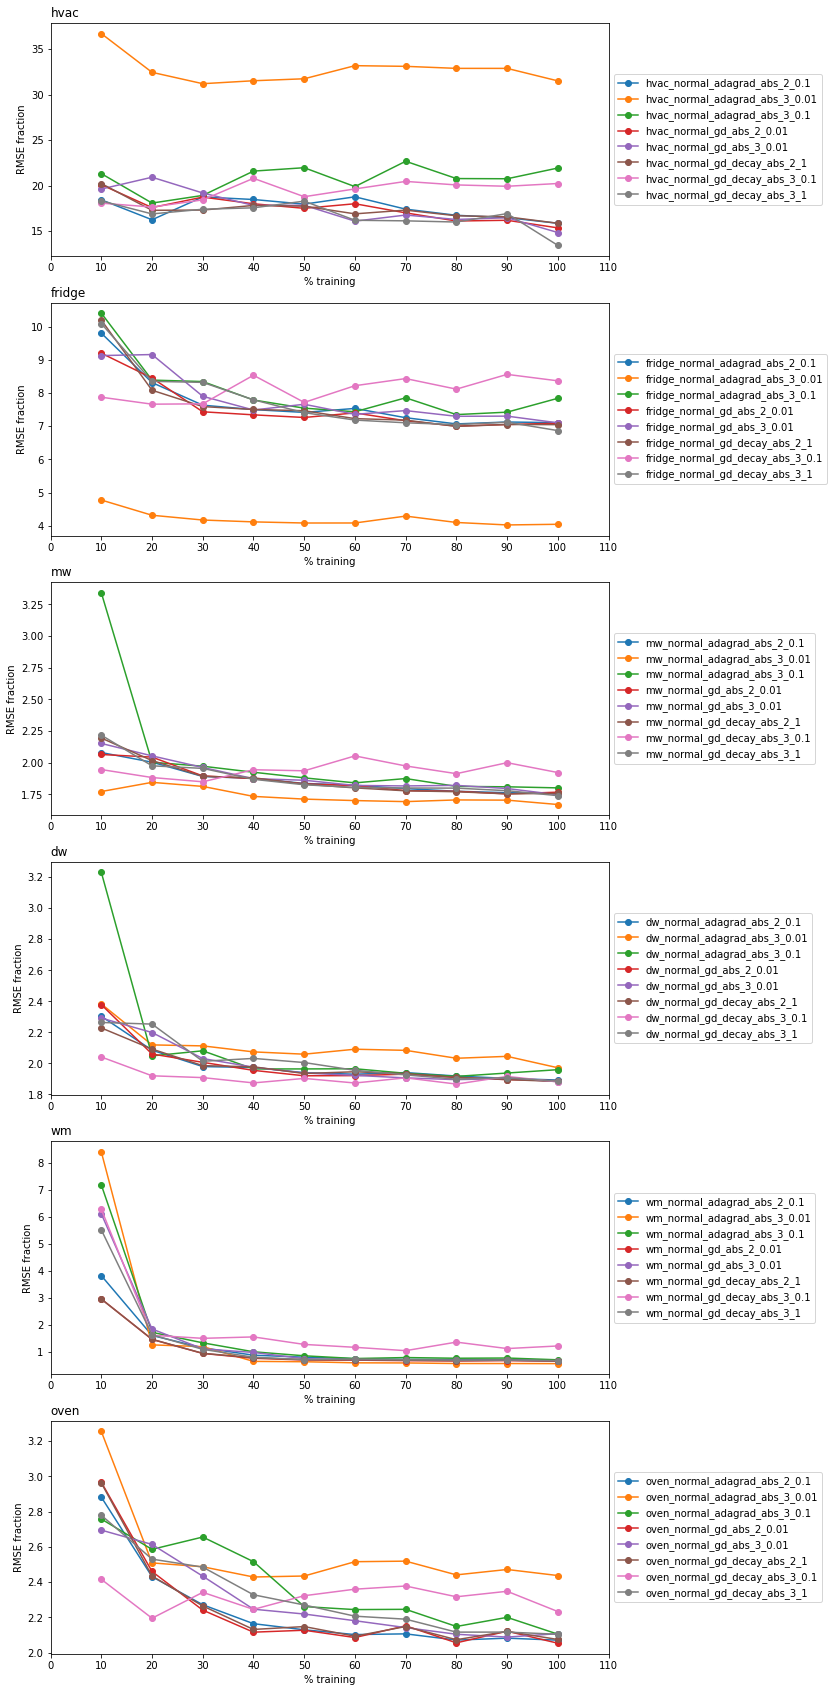

In [83]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(50, 100))
ax = axes.flatten()
count = 0

dfs = {}

index = [1,5,6,20,25,42,46,47]
# index = [x+110 for x in index]


for appliance in APPLIANCES_ORDER[1:]:
    dfs = {}
    num = 0
    
    for method in ['normal', 'transfer']:
        for algo in ['adagrad', 'gd', 'gd_decay']:
            for cost in ['abs', 'rel']:
                for a in [2, 3]:
                    for lr in [0.01, 0.1, 1, 10, 100]:
                        dfs[num] = mean_out[method][algo][cost][a][lr][appliance + "_" +  method + "_" + algo + "_" + cost + "_" + str(a) + "_" + str(lr)]
                        num += 1
    
    df = pd.concat([dfs[index[0]], dfs[index[1]]], axis = 1)
    for i in range(2, len(index)):
        df = pd.concat([df, dfs[index[i]]], axis = 1)
    
    
#     df = pd.concat([dfs[3], dfs[33]], axis=1)
    pd.DataFrame(df).plot(ax=ax[count],figsize=(10, 30), marker='o', xlim=(0, 110))
    ax[count].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    ax[count].set_xlabel("% training");
    ax[count].locator_params(tight=False, nbins=20, axis='x')
    ax[count].set_ylabel('RMSE fraction')
    ax[count].set_title(appliance, loc="left")
    count += 1
# plt.savefig("./analysis/0720/transfer_gd_decay_rel_2.pdf", bbox_inches="tight", dpi=300, format="pdf")

## Check Convergency

In [141]:
import pickle
Hs = {}
As = {}
Ts = {}
costs = {}
HATs = {}


for region in ['SanDiego', 'Austin']:
    Hs[region] = {}
    As[region] = {}
    Ts[region] = {}
    costs[region] = {}
    HATs[region] = {}
    for algo in ['adagrad', 'gd', 'gd_decay']:
        Hs[region][algo] = {}
        As[region][algo] = {}
        Ts[region][algo] = {}
        costs[region][algo] = {}
        HATs[region][algo] = {}
        for cost in['abs', 'rel']:
            Hs[region][algo][cost] = {}
            As[region][algo][cost] = {}
            Ts[region][algo][cost] = {}
            costs[region][algo][cost] = {}
            HATs[region][algo][cost] = {}
            for a in [2, 3]:
                Hs[region][algo][cost][a] = {}
                As[region][algo][cost][a] = {}
                Ts[region][algo][cost][a] = {}
                costs[region][algo][cost][a] = {}
                HATs[region][algo][cost][a] = {}
                for lr in [0.01, 0.1, 1, 10, 100]:
                    lr = float(lr)
                    Hs[region][algo][cost][a][lr] = {}
                    As[region][algo][cost][a][lr] = {}
                    Ts[region][algo][cost][a][lr] = {}
                    costs[region][algo][cost][a][lr] = {}
                    HATs[region][algo][cost][a][lr] = {}
                    
                    print method, algo, cost, a, lr, random_seed
                    Hs[region][algo][cost][a][lr]['normal'] = load_obj('series/Hs_normal_' + region + '_' + algo + '_'
                                                                           + cost + '_' + str(a) + '_' + str(lr))
                    As[region][algo][cost][a][lr]['normal'] = load_obj('series/As_normal_' + region + '_' + algo + '_'
                                                                           + cost + '_' + str(a) + '_' + str(lr))
                    Ts[region][algo][cost][a][lr]['normal'] = load_obj('series/Ts_normal_' + region + '_' + algo + '_'
                                                                           + cost + '_' + str(a) + '_' + str(lr))
                    HATs[region][algo][cost][a][lr]['normal'] = load_obj('series/HATs_normal_' + region + '_' + algo + '_'
                                                                           + cost + '_' + str(a) + '_' + str(lr))
                    costs[region][algo][cost][a][lr]['normal'] = load_obj('series/costs_normal_' + region + '_' + algo + '_'
                                                                           + cost + '_' + str(a) + '_' + str(lr))
                    if region == 'Austin':
                        Hs['SanDiego'][algo][cost][a][lr]['transfer'] = load_obj('series/Hs_transfer_SanDiego_' + algo + '_'
                                                                           + cost + '_' + str(a) + '_' + str(lr))
                        As['SanDiego'][algo][cost][a][lr]['transfer'] = load_obj('series/As_transfer_SanDiego_' + algo + '_'
                                                                               + cost + '_' + str(a) + '_' + str(lr))
                        Ts['SanDiego'][algo][cost][a][lr][r'transfer'] = load_obj('series/Ts_transfer_SanDiego_'  + algo + '_'
                                                                               + cost + '_' + str(a) + '_' + str(lr))
                        HATs['SanDiego'][algo][cost][a][lr]['transfer'] = load_obj('series/HATs_transfer_SanDiego_' + algo + '_'
                                                                               + cost + '_' + str(a) + '_' + str(lr))
                        costs['SanDiego'][algo][cost][a][lr]['transfer'] = load_obj('series/costs_transfer_SanDiego_' + algo + '_'
                                                                           + cost + '_' + str(a) + '_' + str(lr))

transfer adagrad abs 2 0.01 0
transfer adagrad abs 2 0.1 0
transfer adagrad abs 2 1.0 0
transfer adagrad abs 2 10.0 0
transfer adagrad abs 2 100.0 0
transfer adagrad abs 3 0.01 0
transfer adagrad abs 3 0.1 0
transfer adagrad abs 3 1.0 0
transfer adagrad abs 3 10.0 0
transfer adagrad abs 3 100.0 0
transfer adagrad rel 2 0.01 0
transfer adagrad rel 2 0.1 0
transfer adagrad rel 2 1.0 0
transfer adagrad rel 2 10.0 0
transfer adagrad rel 2 100.0 0
transfer adagrad rel 3 0.01 0
transfer adagrad rel 3 0.1 0
transfer adagrad rel 3 1.0 0
transfer adagrad rel 3 10.0 0
transfer adagrad rel 3 100.0 0
transfer gd abs 2 0.01 0
transfer gd abs 2 0.1 0
transfer gd abs 2 1.0 0
transfer gd abs 2 10.0 0
transfer gd abs 2 100.0 0
transfer gd abs 3 0.01 0
transfer gd abs 3 0.1 0
transfer gd abs 3 1.0 0
transfer gd abs 3 10.0 0
transfer gd abs 3 100.0 0
transfer gd rel 2 0.01 0
transfer gd rel 2 0.1 0
transfer gd rel 2 1.0 0
transfer gd rel 2 10.0 0
transfer gd rel 2 100.0 0
transfer gd rel 3 0.01 0
transfe

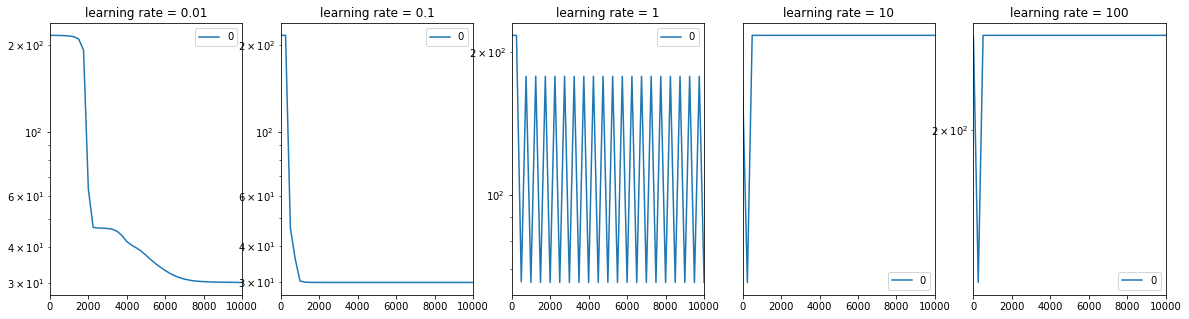

In [143]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,5))
ax = axes.flatten()
count=0
idx = np.arange(0, 10100, 250)

for lr in [0.01, 0.1, 1, 10, 100]:
    tdf = pd.DataFrame(costs['SanDiego']['gd']['abs'][2][lr]['normal'], index=idx)
    tdf.plot(logy=True, ax=ax[count])
   
    ax[count].set_title("learning rate = " + str(lr))
    count += 1
# plt.savefig("./analysis/0720/SD_transfer_gd_decay_rel_2_cost.pdf", bbox_inches="tight", dpi=300, format="pdf")